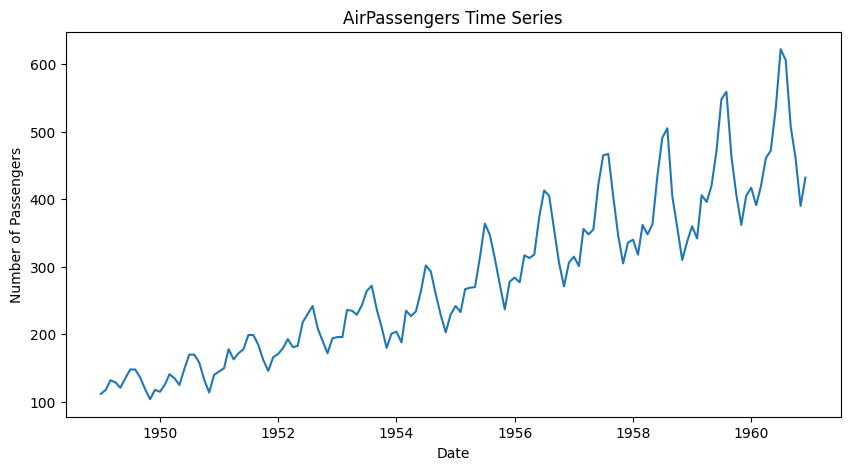

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
Critical Values:
	1%: -3.4816817173418295
	5%: -2.8840418343195267
	10%: -2.578770059171598


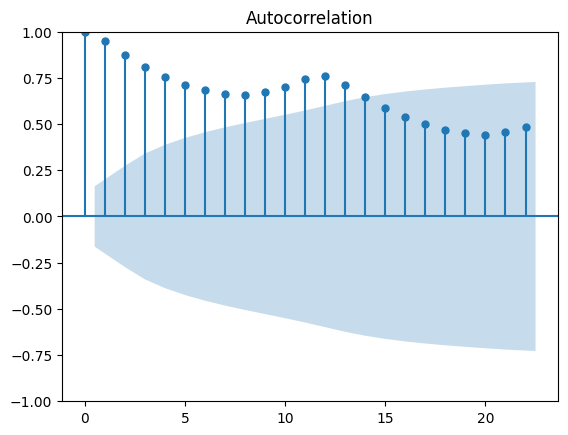

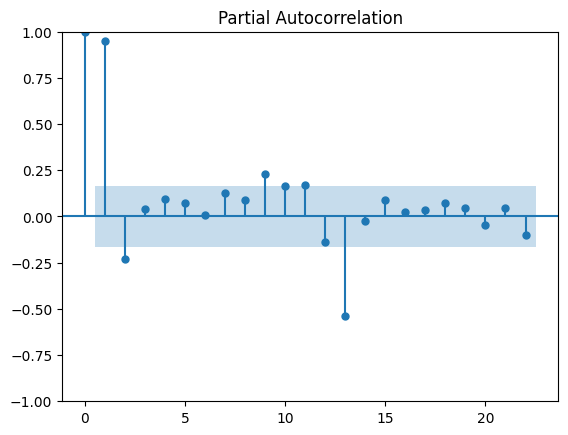

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


RMSE: 30.142008134932393


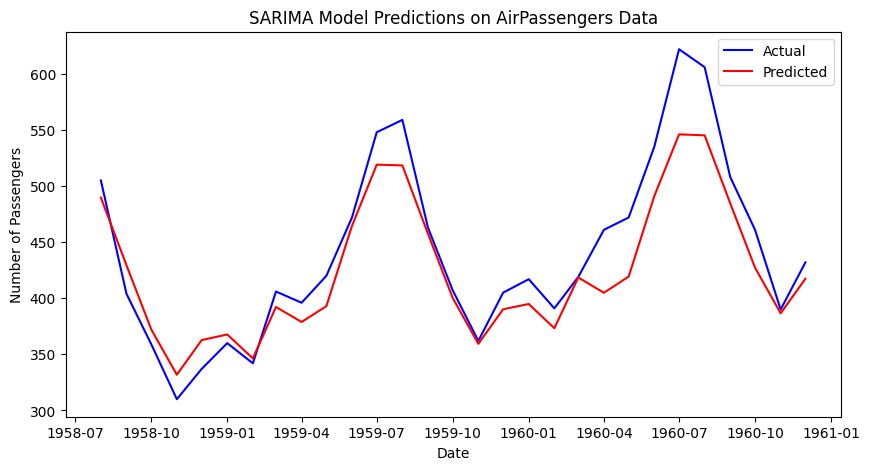


RESULT:
Thus, the SARIMA model was successfully implemented using the AirPassengers dataset.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Load your uploaded AirPassengers dataset
data = pd.read_csv('/content/data-AirPassengers.csv')

# Convert 'Period' to datetime and set as index
data['Period'] = pd.to_datetime(data['Period'], format='%m/%Y')
data.set_index('Period', inplace=True)

# Extract the main time series
series = data['AirPassengers']

# Plot the passenger data
plt.figure(figsize=(10,5))
plt.plot(series.index, series)
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.title('AirPassengers Time Series')
plt.show()

# Function to check stationarity
def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')

# Check stationarity
check_stationarity(series)

# ACF and PACF plots
plot_acf(series)
plt.show()

plot_pacf(series)
plt.show()

# Train-test split
train_size = int(len(series) * 0.8)
train, test = series[:train_size], series[train_size:]

# Fit SARIMA model
sarima_model = SARIMAX(train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit(disp=False)

# Forecast
predictions = sarima_result.predict(start=len(train), end=len(train) + len(test) - 1, dynamic=False)

# RMSE calculation
mse = mean_squared_error(test, predictions)
rmse = np.sqrt(mse)
print('RMSE:', rmse)

# Plot actual vs predicted
plt.figure(figsize=(10,5))
plt.plot(test.index, test, label='Actual', color='blue')
plt.plot(test.index, predictions, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.title('SARIMA Model Predictions on AirPassengers Data')
plt.legend()
plt.show()

print("\nRESULT:")
print("Thus, the SARIMA model was successfully implemented using the AirPassengers dataset.")
